## INSTRUCTIONS

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:
1. Data from our lives
2. Data manipulation/Exploratory Data Analysis
3. Multipe regression Analysis

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. **Add as many cells as you need**, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Send in both a ipynb and a pdf file of your work.

Good luck!


## 1. Data from our Lives

### Describe a situation or problem from your job, everyday life, current events, etc., for which a regression model would be appropriate. List some (up to 5) predictors that you might use.

**your answer should go here**

Movie ratings can be considered as an excellent example of a situation where a regression model can be used. Let's consider the issue of predicting a movie's user rating based on various predictors:

In the film industry, a regression model can be used to predict user ratings for movies. This is a common issue for movie studios, streaming platforms, and critics who want to estimate the audience's opinion of a movie. Many predictors can be used for building a regression model for predicting movie ratings:

1) Cast: The star power of the actors involved can affect a movie's expected rating. A popular ensemble cast can draw more viewers.
2) Trailer Views: The number of views or engagement with a movie's trailer can be a predictor. High viewer interest in a trailer might indicate higher intrest for the film.
3) Budget: The budget allocated for a movie's production can play a role in expectations. High-budget movies might be expected to perform better.
4) Genre: The genre of a movie can be a significant predictor. Different genres (like action, romance, sci-fi) may attract different target audiences with varying preferences.
5) Director: The reputation and track record of the movie's director can influence the expected rating. Well-known directors may have a loyal following.

if we can collect data on these predictors and historical user ratings for movies, a regression model can be trained to predict the user rating of a movie based on these factors. This information can be valuable for movie studios, streaming platforms, and critics to gauge the potential success and audience reception of a film before its release.



## The data

**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

In [1]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
#Read in data
df =pd.read_csv('auto_imports1.csv')

df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


## 2. Data

## 2.1 Munging

Check what types of variables do you have in your data? Do you see anything that doesn't make sense? *Hint: horse power is  an object ?!*

In [3]:
##your code here

# To Check the data types of all columns in the DataFrame
Auto_data_types = df.dtypes

print(Auto_data_types)



fuel_type       object
body            object
wheel_base     float64
length         float64
width          float64
heights        float64
curb_weight      int64
engine_type     object
cylinders       object
engine_size      int64
bore            object
stroke          object
comprassion    float64
horse_power     object
peak_rpm        object
city_mpg         int64
highway_mpg      int64
price            int64
dtype: object


### Replace '?' with None

### Change the variables: bore, stroke, horse_power, peak_rpm to float64

In [4]:
## Your code here

## Replacing ? with none throught the dataset
df = df.replace('?', None)

##converting object to float variables
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)
df['horse_power'] = df['horse_power'].astype(float)
df['peak_rpm'] = df['peak_rpm'].astype(float)


In [5]:
# Checking for remaining '?'
question_marks_remaining = (df == '?').sum().sum()

if question_marks_remaining == 0:
    print("no remaining '?' values in the dataset.")
else:
    print("{question_marks_remaining} remaining '?' values in the dataset.")


no remaining '?' values in the dataset.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

### Drop body,engine_type,cylinders columns and name the new dataframe df2

In [7]:
## Your code here

# Droping the specified columns and creating a new DataFrame df2
df2 = df.drop(columns=["body", "engine_type", "cylinders"])

In [8]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


### Drop all nan values

In [9]:
## your code goes here

## Droping rows with nan values
df2.dropna(inplace=True)


In [10]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

### Get dummy variables for fuel_type within df2 drop first level

In [11]:
## Your code goes here

# Creating dummy variables for fuel_type within df2 and droping the first level
df2 = pd.get_dummies(df2, columns=['fuel_type'], drop_first=True)


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    float64
 10  peak_rpm       195 non-null    float64
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    uint8  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.0 KB


## 2.2 EDA on df2

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

Suggested Steps in EDA:

    Provide descriptions of your sample and features
    Check for missing data
    Identify the shape of your data
    Identify significant correlations
    Spot/deal with outliers in the dataset

These steps are a guidline. Try different things and share your insights about the dataset (**df2**).

Don't forget to add "markdown" cells to include your findings or to explain what you are doing


In [13]:
## Your EDA should start here


df2.value_counts()

wheel_base  length  width  heights  curb_weight  engine_size  bore  stroke  comprassion  horse_power  peak_rpm  city_mpg  highway_mpg  price  fuel_type_gas
93.7        157.3   63.8   50.8     2128         98           3.03  3.39    7.6          102.0        5500.0    24        30           7957   1                2
96.3        172.4   65.4   51.6     2403         110          3.17  3.46    7.5          116.0        5500.0    23        30           9279   1                2
93.7        157.3   63.8   50.6     1967         90           2.97  3.23    9.4          68.0         5500.0    31        38           6229   1                2
86.6        144.6   63.9   50.8     1713         92           2.91  3.41    9.6          58.0         4800.0    49        54           6479   1                1
100.4       181.7   66.5   55.1     3095         181          3.43  3.27    9.0          152.0        5200.0    17        22           13499  1                1
                                       

In [14]:
df2.peak_rpm.unique()

array([5000., 5500., 5800., 4250., 5400., 5100., 4800., 6000., 4750.,
       4650., 4200., 4350., 4500., 5200., 4150., 5600., 5900., 5250.,
       4900., 4400., 6600., 5300.])

In [15]:
df2.describe()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385,0.897436
std,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093,0.304170
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000
25%,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000,1.000000
50%,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000,1.000000
75%,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000,1.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000


In [16]:
df_null=df2.isna()
df_null.head()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
df2.shape

(195, 15)

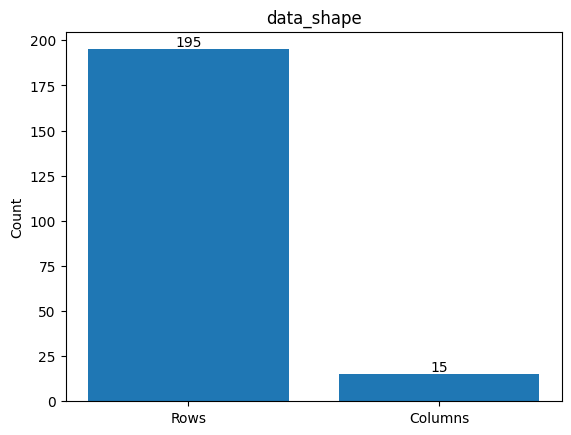

In [18]:
# Get the shape of the Data
data_shape = df2.shape

# bar plot
plt.bar(['Rows', 'Columns'], data_shape)
plt.text('Rows', data_shape[0], str(data_shape[0]), ha='center', va='bottom')
plt.text('Columns', data_shape[1], str(data_shape[1]), ha='center', va='bottom')
plt.ylabel('Count')
plt.title('data_shape')

plt.show()

In [19]:
df2.corr()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
wheel_base,1.000000,0.879222,0.819009,0.592500,0.782720,0.569704,0.498228,0.171722,0.247730,0.375541,-0.352331,-0.499126,-0.566355,0.585793,-0.303643
length,0.879222,1.000000,0.858084,0.496218,0.881665,0.687479,0.609437,0.118664,0.160172,0.583813,-0.280986,-0.689660,-0.719324,0.695331,-0.210618
width,0.819009,0.858084,1.000000,0.315834,0.867315,0.740320,0.544311,0.186432,0.190997,0.616779,-0.251627,-0.647099,-0.692220,0.754273,-0.245375
heights,0.592500,0.496218,0.315834,1.000000,0.307732,0.031286,0.189283,-0.055525,0.261160,-0.084412,-0.264078,-0.102367,-0.151188,0.138291,-0.279070
curb_weight,0.782720,0.881665,0.867315,0.307732,1.000000,0.857573,0.645806,0.172785,0.155382,0.760285,-0.278944,-0.772171,-0.812710,0.835729,-0.219488
engine_size,0.569704,0.687479,0.740320,0.031286,0.857573,1.000000,0.583091,0.211989,0.024617,0.842691,-0.219008,-0.710624,-0.732138,0.888942,-0.063490
bore,0.498228,0.609437,0.544311,0.189283,0.645806,0.583091,1.000000,-0.066793,0.003057,0.568527,-0.277662,-0.591950,-0.600040,0.546873,-0.056245
stroke,0.171722,0.118664,0.186432,-0.055525,0.172785,0.211989,-0.066793,1.000000,0.199882,0.100040,-0.068300,-0.027641,-0.036453,0.093746,-0.253774
comprassion,0.247730,0.160172,0.190997,0.261160,0.155382,0.024617,0.003057,0.199882,1.000000,-0.214401,-0.444582,0.331413,0.267941,0.069500,-0.985398
horse_power,0.375541,0.583813,0.616779,-0.084412,0.760285,0.842691,0.568527,0.100040,-0.214401,1.000000,0.105654,-0.834117,-0.812917,0.811027,0.168454


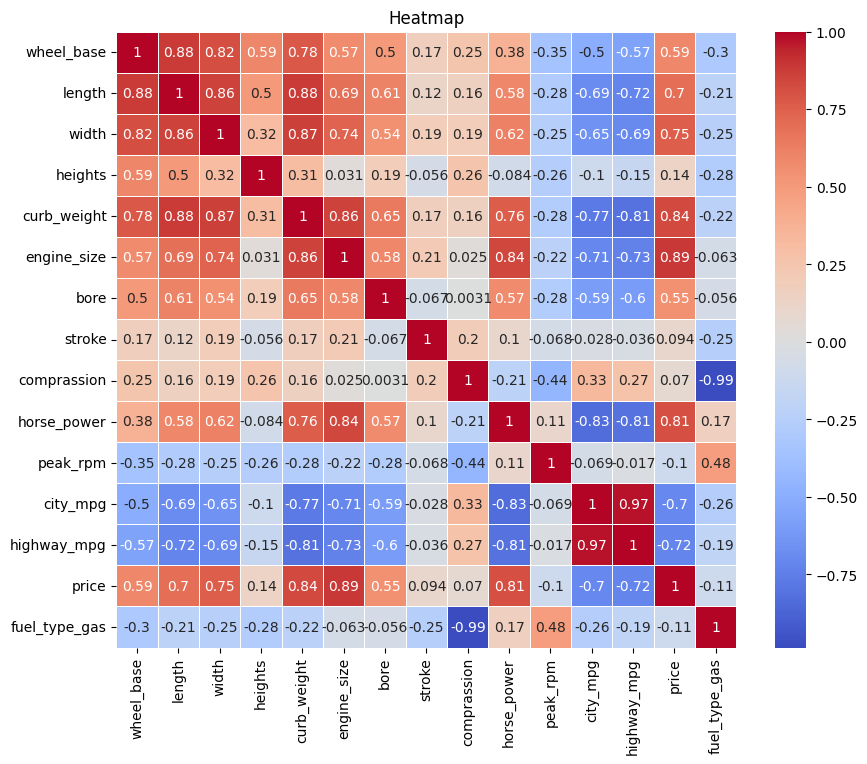

In [20]:
df2_matrix = df2.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df2_matrix, annot=True, cmap='coolwarm', linewidths=0.7)
plt.title('Heatmap')
plt.show()

In [21]:
to_find_p_values = pd.DataFrame(np.zeros_like(df2_matrix), columns=df2_matrix.columns, index=df2_matrix.columns)

# calculate p-values
for col1 in df2_matrix.columns:
    for col2 in df2_matrix.columns:
        if col1 != col2:
            corr, to_find_p_value = stats.pearsonr(df2[col1], df2[col2])
            to_find_p_values.at[col1, col2] = to_find_p_value

# assigning the significance level
alpha = 0.05

significant_correlations = (to_find_p_values < alpha) & (to_find_p_values != 0)

# significant correlations
print("Significant Correlations:\n", significant_correlations)


Significant Correlations:
                wheel_base  length  width  heights  curb_weight  engine_size  \
wheel_base          False    True   True     True         True         True   
length               True   False   True     True         True         True   
width                True    True  False     True         True         True   
heights              True    True   True    False         True        False   
curb_weight          True    True   True     True        False         True   
engine_size          True    True   True    False         True        False   
bore                 True    True   True     True         True         True   
stroke               True   False   True    False         True         True   
comprassion          True    True   True     True         True        False   
horse_power          True    True   True    False         True         True   
peak_rpm             True    True   True     True         True         True   
city_mpg             True

(0.0, 55.98656904656415)

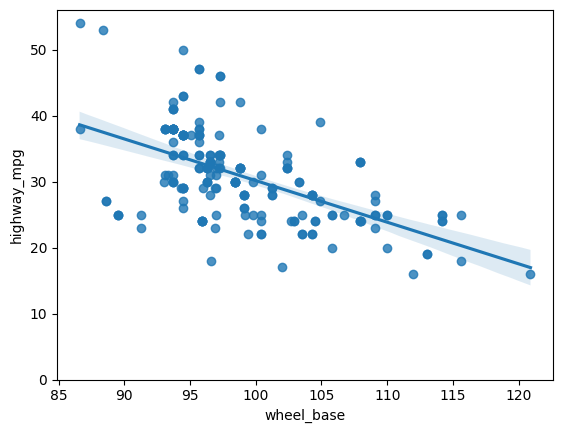

In [22]:
sns.regplot(x="wheel_base", y="highway_mpg", data=df2)
plt.ylim(0,)

 These two are negatively and weekly correlated as the the line is plotted reversly, coefficient value is  not closer to one and negative value. So, if the highway_mpg increses, wheel_base  decreses

(0.0, 72.585)

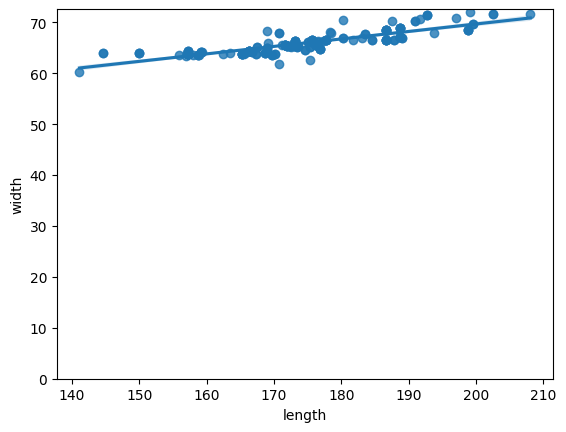

In [23]:
sns.regplot(x="length", y="width", data=df2)
plt.ylim(0,)

Here There is a positive correlation with Lenght and width. So width and lenght seems good predictor because the line goes perfectly inbetween the points. Since this is significant.

(0.0, 4.01)

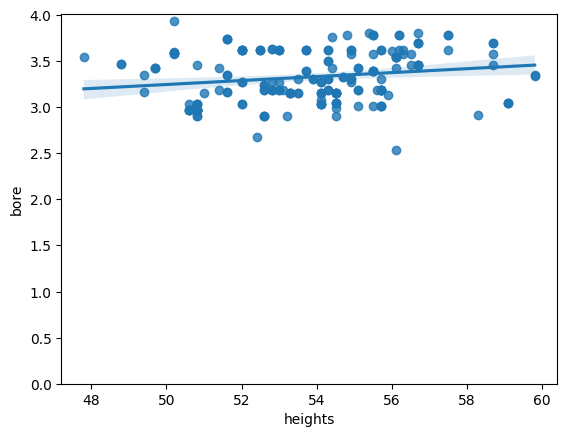

In [24]:
sns.regplot(x="heights", y="bore", data=df2)
plt.ylim(0,)

Here There is a positive correlation with heights and bore but weekly correlated. So heights and bore seems not predictor because there is not too much related to each other. Since this is week significant.

In [25]:
df2[["heights", "bore"]].corr()
## so the score is 0.189

,heights,bore
heights,1.000000,0.189283
bore,0.189283,1.000000


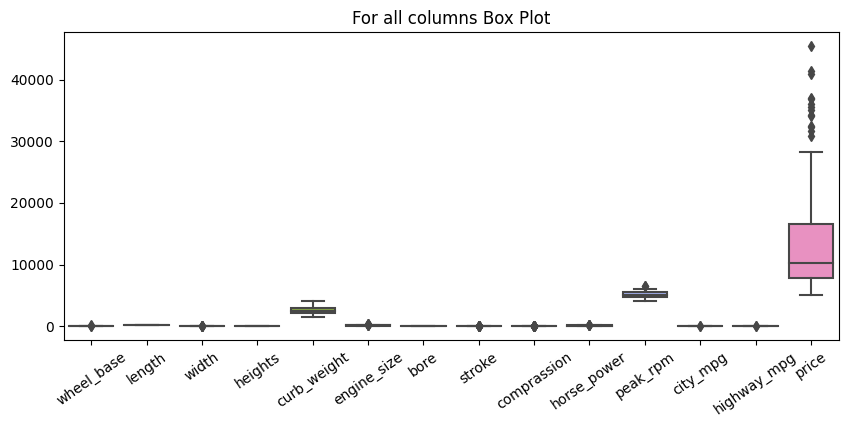

In [26]:
# Selecting all numeric columns from df2
find_outliers = df2.select_dtypes(include=['float64', 'int64'])

# For all numeric columns ploting box plot
plt.figure(figsize=(10, 4))
sns.boxplot(data=find_outliers)
plt.title("For all columns Box Plot")
plt.xticks(rotation=35)
plt.show()

In [27]:
# intialising discribe values to  summary statistics for the numeric columns
summ_stats = df2.describe()

# count of outliers using the IQR method
Q1 = summ_stats.loc['25%']
Q3 = summ_stats.loc['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# outliers for each column
out_liers = (df2 < lower_bound) | (df2 > upper_bound)

#  outliers
print("Outliers:")
print(out_liers.sum())


Outliers:
wheel_base        3
length            0
width             7
heights           0
curb_weight       0
engine_size       7
bore              0
stroke           18
comprassion      27
horse_power       5
peak_rpm          2
city_mpg          2
highway_mpg       2
price            14
fuel_type_gas    20
dtype: int64


In [28]:
#Handling Outliers, Data Transformation, and Winsorizing
outli_columns = ['wheel_base','heights', 'width', 'engine_size', 'stroke', 'comprassion', 'horse_power', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price', 'fuel_type_gas']

for col in outli_columns:
    #Identify and handle outliers using the IQR method
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df2 = df2[~((df2[col] < lower_bound) | (df2[col] > upper_bound))]  #  to Remove outliers

    # data transformation
    df2[col] = np.log(df2[col])

    #Winsorize the column
    lower_winsor_bound = df2[col].quantile(0.10)
    upper_winsor_bound = df2[col].quantile(0.90)
    df2[col] = np.clip(df2[col], lower_winsor_bound, upper_winsor_bound)

#Checking Outliers
for col in outli_columns:
    outliers = ((df2[col] > lower_bound) & (df2[col] < upper_bound))
    print(f"Outliers in {col}: {outliers.sum()}")


Outliers in wheel_base: 0
Outliers in heights: 0
Outliers in width: 0
Outliers in engine_size: 0
Outliers in stroke: 0
Outliers in comprassion: 0
Outliers in horse_power: 0
Outliers in peak_rpm: 0
Outliers in city_mpg: 0
Outliers in highway_mpg: 0
Outliers in price: 0
Outliers in fuel_type_gas: 0


<ipython-input-28-07e8d5985de0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = np.log(df2[col])
<ipython-input-28-07e8d5985de0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = np.clip(df2[col], lower_winsor_bound, upper_winsor_bound)
<ipython-input-28-07e8d5985de0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

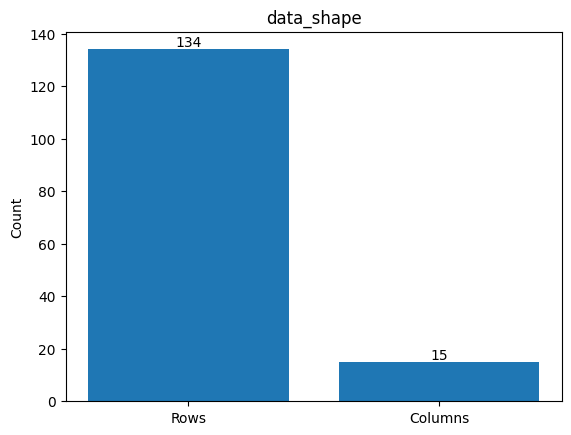

In [29]:
# Get the shape of the Data
data_shape = df2.shape

# bar plot
plt.bar(['Rows', 'Columns'], data_shape)
plt.text('Rows', data_shape[0], str(data_shape[0]), ha='center', va='bottom')
plt.text('Columns', data_shape[1], str(data_shape[1]), ha='center', va='bottom')
plt.ylabel('Count')
plt.title('data_shape')

plt.show()

## 3. Multiple Regression Analysis ! Use the df2 dataset!

**1. Create a model that uses all the variables** and call it model1. The dependent variable is price, the independent variables are all the rest. Print out a summary of the model (coefficents, stanrard errors, confidence intervals and other metrics shown in class and answer the quesions based on your output.

In [30]:
##Your code goes here

# dependent variable
d_y = df2['price']
#  independent variables
i_X = df2.drop(columns=['price'])
i_X = sm.add_constant(i_X)

# Creating the OLS model
model1 = sm.OLS(d_y, i_X).fit()
# Print the summary of the model
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     61.95
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           7.78e-47
Time:                        01:51:08   Log-Likelihood:                 90.893
No. Observations:                 134   AIC:                            -153.8
Df Residuals:                     120   BIC:                            -113.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.2873      5.442      0.420

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it?
5. What is the F-statistics used for? How do you interpret it for this model?


1. Interpreting the Intercept:
The "const" is approximately 2.2873. It represents the estimated value of price when all independent variables are zero. This interpretation might not be meaningful since it's unlikely that all variables could be zero.

2. Statistically Significant Variables:
We can identify significant variables by looking at the "P>|t|" column in the output. "wheel_base," "stroke," "horse_power," and "peak_rpm" have low p-values so we can consider these variables are significant variable.

3. Variance of the Model:
Ok From the output we can add both df moodel and df residual = 133.

4. Coefficient of Determination (R-squared):
 The R-squared is approximately 0.870. This means that approximately 87% of the variance in price is explained by the independent variables in the model.

5. F-Statistics and Its Interpretation:
The value of F-statistic is 61.95, and  p-value (Prob(F-statistic)) is 7.78e-47. This shows that the model, is statistically significant. There is strong evidence to suggest that at least one independent variable significantly contributes to explain the variance in price. The F-statistic being significantly different from zero supports the significance of the model.



**2. Drop all the variables that are not statistically significant** at least at 90% confidence level. Run another regression model with price as the dependent variable and the rest of the variables as the independent variabls. Call it model2. Print a summary of the results and answer the questions bellow.

In [31]:
## your code goes here


list_signi_vars = ['wheel_base', 'stroke', 'horse_power', 'peak_rpm']

# Select only the significant variables and add a constant term
i_X = df2[list_signi_vars]
i_X = sm.add_constant(i_X)

# Create the dependent variable
d_y = df2['price']

# Fit the regression model (model2)
model2 = sm.OLS(d_y, i_X).fit()

# Print a summary of the results
print(model2.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     177.1
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           2.22e-51
Time:                        01:51:13   Log-Likelihood:                 79.360
No. Observations:                 134   AIC:                            -148.7
Df Residuals:                     129   BIC:                            -134.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -7.3259      2.609     -2.808      

1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it? What is the Adjusted R-squared and compare it to the model1's value.
5. What is the F-statistics used for? How do you interpret it for this model?

1. Interpreting the Intercept:
The "const" is approximately -7.3259. It represents the estimated value of price when all independent variables are zero. This interpretation might not be practical since it's unlikely that all variables could be zero.

2. Statistically Significant Variables:
We can identify significant variables by looking at the "P>|t|" column in the output. "wheel_base," "stroke," "horse_power," and "peak_rpm" have low p-values so we can consider these variables are significant variable.

3. Variance of the Model:
Ok From the output we can add both df moodel and df residual = 133.

4. Coefficient of Determination (R-squared):
 The R-squared is approximately 0.846,. This means that approximately 84% of the variance in price is explained by the independent variables in the model. and Adjusted R-squared - The Adjusted R-squared is 0.841 in model2.
Comparing it to model1's value (0.856) with model 2, the Adj. R-squared in model1 is slightly higher, suggesting that the additional predictors in model1 may contribute to a better fit, even though some of them are not statistically significant.

5. F-Statistics and Its Interpretation:
The value of F-statistic is 177.1 , and  p-value (Prob(F-statistic)) is 2.22e-51. This shows that the model, is statistically significant. There is strong evidence to suggest that at least one independent variable significantly contributes to explain the variance in price. The F-statistic being significantly different from zero supports the significance of the model.


**3. Compare the two models with ANOVA**. What are your null and alternative hypothesis? What is your conclusion?

For Model 1:

Null Hypothesis (H0): There is no significant difference in model fit.
Alternative Hypothesis (Ha): There is a significant difference in model fit.
Result: The p-value (7.78e-47) is much less than the significance level (0.05), so we reject the null hypothesis. Model 1 is statistically significant.

For Model 2:
Null Hypothesis (H0): There is no significant difference in model fit.
Alternative Hypothesis (Ha): There is a significant difference in model fit.
Result: The p-value (2.22e-51) is much less than the significance level (0.05), so we reject the null hypothesis. Model 2 is statistically significant.

In [32]:
##your code goes here
# F-statistic and p-value for Model 1
f_statistic_model1 = 61.95
p_value_model1 = 7.78e-47

# F-statistic and p-value for Model 2
f_statistic_model2 = 177.1
p_value_model2 = 2.22e-51

# Significance level
alpha = 0.05

# Compare the two models using ANOVA
if p_value_model1 < alpha:
    print("Model 1 is statistically significant.")
else:
    print("Model 1 is not statistically significant.")

if p_value_model2 < alpha:
    print("Model 2 is statistically significant.")
else:
    print("Model 2 is not statistically significant.")


Model 1 is statistically significant.
Model 2 is statistically significant.


**4.Checking the assumptions:**

-What are the assumptions?

-Do they hold?

Linearity: The relationship between the independent variables and the dependent variable should be linear. 1 nm 2 m

Independence of Errors: The errors should be independent of each other. 1 m 2 nm

Homoscedasticity: The variance of the errors should be constant across all levels of the independent variables.1 nm,2 m

Normality of Errors: The errors should follow a normal distribution. 1 m 2 m

Multicollinearity: Independent variables should not be highly correlated with each other. 1 m 2 m

Now, let's discuss whether these assumptions hold for your models (Model 1 and Model 2):

1) Model 1:
Linearity: independent variables against the dependent variable in your data is NOT MET because residuals did not randomly scattered around zero for each independent variable.

Independence of Errors:The residuals are randomly scattered around zero, this assumption is met.

Homoscedasticity:  The spread of residuals is not consistent across all levels of the fitted values, homoscedasticity is NOT Met.

Normality of Errors: The residuals are approximately normally distributed, this assumption is met.

Multicollinearity: For Model 1, you can calculate the VIF for each independent variable to check for multicollinearity
it is >5 so it is met

2) Model 2:
Linearity: independent variables against the dependent variable in your data is not MET because residuals randomly scattered around zero for each independent variable.

Independence of Errors:The residuals are not randomly scattered around zero, this assumption is NOT Met.

Homoscedasticity:  The spread of residuals is consistent across all levels of the fitted values, homoscedasticity is met.

Normality of Errors: The residuals are approximately normally distributed, this assumption is met.

Multicollinearity: For Model 2, we can calculate the VIF for each independent variable to check for multicollinearity
it is >5 so it is met

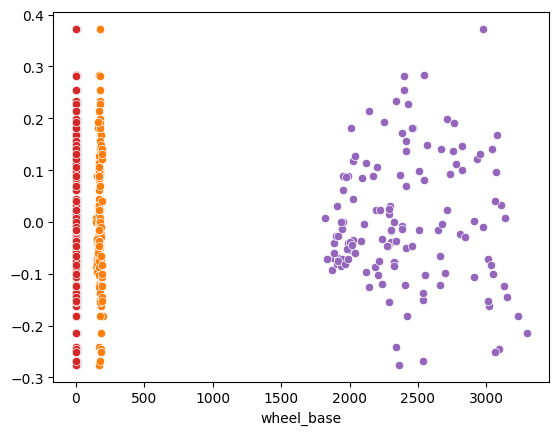

In [33]:
##your code goes here

#Model 1
model1 = sm.OLS(df2['price'], df2.drop(columns=['price']))
output1 = model1.fit()

# residuals calculation
residuals1 = output1.resid

#  scatterplots
for col in df2.columns:
    if col != 'price':
        sns.scatterplot(x=df2[col], y=residuals1)


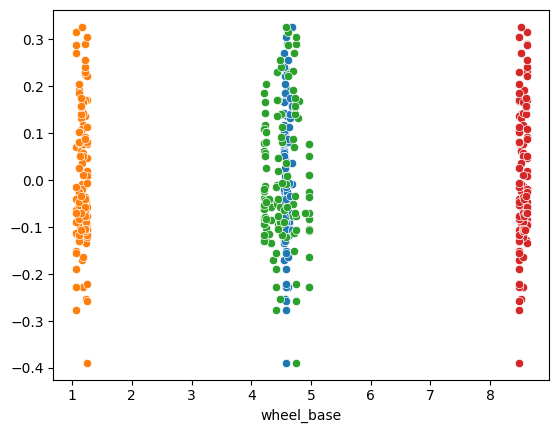

In [34]:
#Model 2
model2 = sm.OLS(df2['price'], df2[['wheel_base', 'stroke', 'horse_power', 'peak_rpm']])
output2 = model2.fit()

# Calculate residuals
residuals2 = output2.resid

# Create scatterplots
for col in df2[['wheel_base', 'stroke', 'horse_power', 'peak_rpm']]:
    sns.scatterplot(x=df2[col], y=residuals2)


<Axes: >

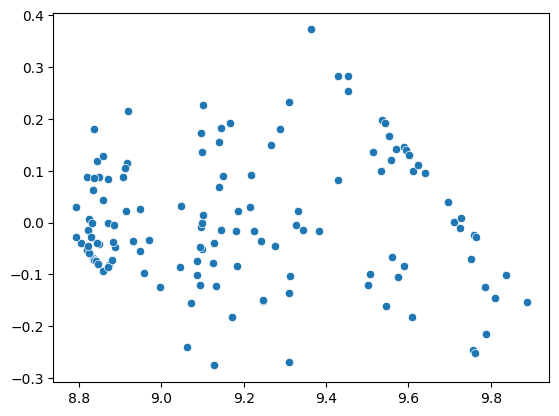

In [35]:
sns.scatterplot(x=output1.fittedvalues, y=residuals1)


<Axes: >

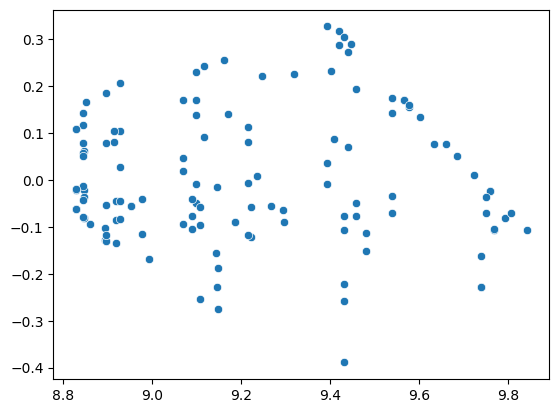

In [36]:
sns.scatterplot(x=output2.fittedvalues, y=residuals2)


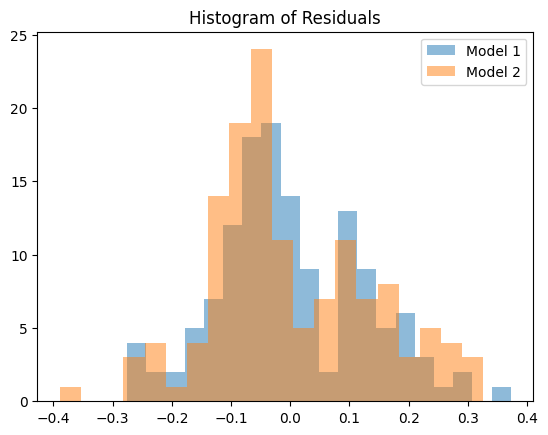

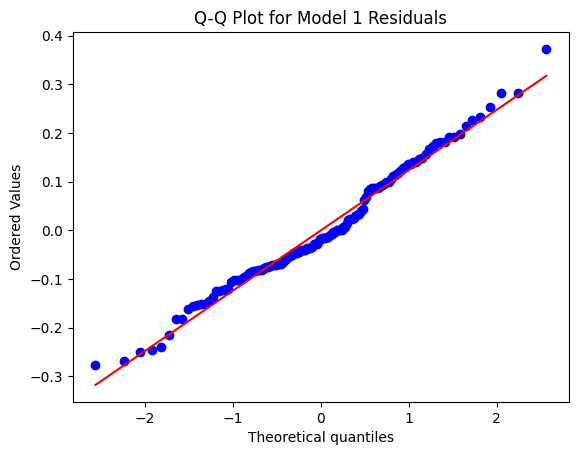

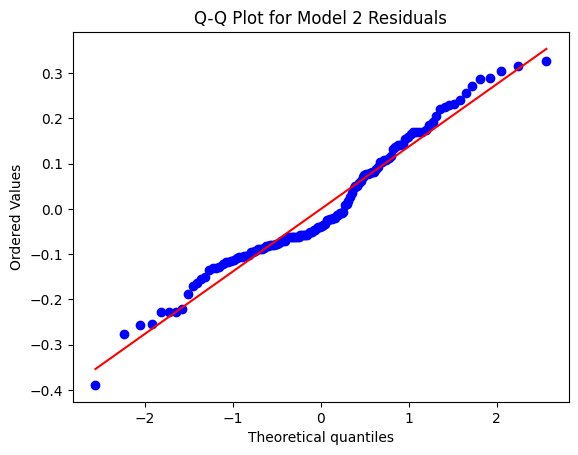

In [37]:
plt.hist(residuals1, bins=20, alpha=0.5, label='Model 1')
plt.hist(residuals2, bins=20, alpha=0.5, label='Model 2')
plt.legend()
plt.title('Histogram of Residuals')
plt.show()


stats.probplot(residuals1, dist="norm", plot=plt)
plt.title("Q-Q Plot for Model 1 Residuals")
plt.show()

stats.probplot(residuals2, dist="norm", plot=plt)
plt.title("Q-Q Plot for Model 2 Residuals")
plt.show()


**5. Is there Multicollinearity in your data?**

In [38]:
##your code goes here

# VIF for Model 1
X1 = df2.drop(columns=['price'])
vif = pd.DataFrame()
vif["column_Variable"] = X1.columns
vif["VIF1"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
print(vif)

   column_Variable          VIF1
0       wheel_base  66078.792478
1           length   1637.090800
2            width  93611.623286
3          heights  22684.724931
4      curb_weight    419.278980
5      engine_size   9570.069438
6             bore    553.682819
7           stroke    865.094873
8      comprassion   7657.538651
9      horse_power   4197.806191
10        peak_rpm  47303.164884
11        city_mpg   8733.109789
12     highway_mpg   9227.241974
13   fuel_type_gas           NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [39]:

# VIF for Model 2
X2 = df2[['wheel_base', 'stroke', 'horse_power', 'peak_rpm']]
vif2 = pd.DataFrame()
vif2["column_Variable"] = X2.columns
vif2["VIF2"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif2)

  column_Variable          VIF2
0      wheel_base  11832.655783
1          stroke    399.442721
2     horse_power    459.597859
3        peak_rpm  10254.497971


Yes there is strong Multicollinearity in the data because vif and vif2 is >5